#### You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:

#### 1. Detect the outliers and remove it using:
- Mean Function
- Percentile method
- IQR(Inter quartile range method)
- Normal distribution
- Zscore method

#### 2. plot the box plot(for all the numerical columns), histplot(to check the normality of the column(price per sqft column))
#### 3. Check the correlation between all the numerical columns and plot heatmap.
#### 4. Scatter plot between the variables to check the correlation between them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('house_price.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [11]:
df.duplicated().sum()

1049

In [12]:
df= df.drop_duplicates()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 13198
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        12151 non-null  object 
 1   size            12151 non-null  object 
 2   total_sqft      12151 non-null  float64
 3   bath            12151 non-null  float64
 4   price           12151 non-null  float64
 5   bhk             12151 non-null  int64  
 6   price_per_sqft  12151 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 759.4+ KB


In [14]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [15]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12151.000000,12151.000000,12151.000000,12151.000000,1.215100e+04
mean,1574.846013,2.719941,115.471328,2.827504,8.132642e+03
std,1277.328354,1.372210,154.094133,1.326540,1.112329e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.312000e+03
50%,1290.000000,2.000000,74.000000,3.000000,5.500000e+03
75%,1700.000000,3.000000,123.500000,3.000000,7.461000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [16]:
df['price_per_sqft'].describe()

count    1.215100e+04
mean     8.132642e+03
std      1.112329e+05
min      2.670000e+02
25%      4.312000e+03
50%      5.500000e+03
75%      7.461000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [17]:
df['price_per_sqft'].min()

267

In [18]:
df['price_per_sqft'].max()

12000000

In [19]:
df['price_per_sqft'].mean()

8132.641840177763

In [20]:
df['price_per_sqft'].median()

5500.0

[]

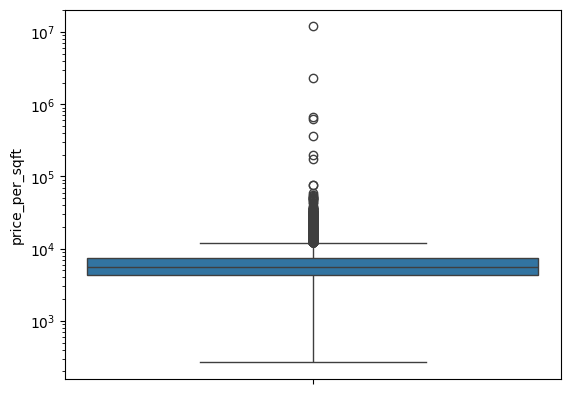

In [21]:
sns.boxplot(data=df.price_per_sqft)
plt.yscale('log')
plt.plot()

### Box plot indicating presence of outliers.

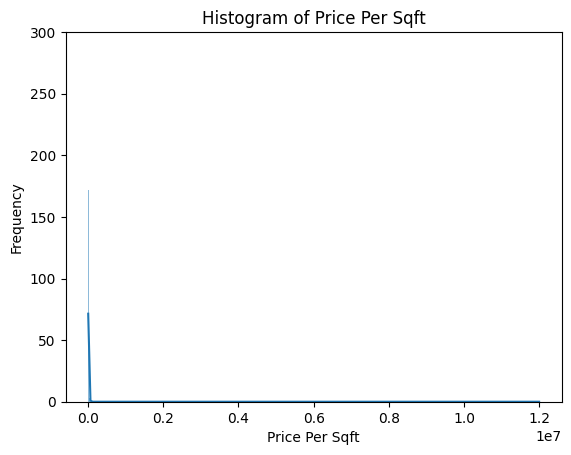

In [22]:
sns.histplot(df['price_per_sqft'], kde=True)
plt.title("Histogram of Price Per Sqft")
plt.xlabel("Price Per Sqft")
plt.ylabel("Frequency")
plt.ylim(0, 300) 
plt.show()

C:\Users\jisma\AppData\Local\Temp\ipykernel_6976\2690481042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'],color='r')


<Axes: xlabel='price_per_sqft', ylabel='Density'>

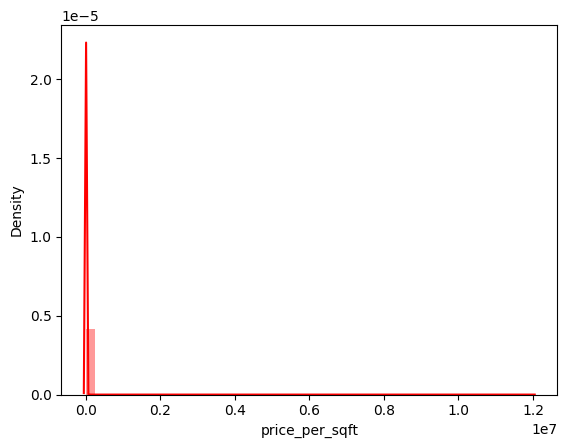

In [13]:
import seaborn as sns
sns.distplot(df['price_per_sqft'],color='r')

### Right skewed

In [23]:
df_numeric=df.drop(['location','size'],axis='columns')
df_numeric

,total_sqft,bath,price,bhk,price_per_sqft
0,1056.0,2.0,39.07,2,3699
1,2600.0,5.0,120.00,4,4615
2,1440.0,2.0,62.00,3,4305
3,1521.0,3.0,95.00,3,6245
4,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...
13194,1715.0,3.0,112.00,3,6530
13195,3453.0,4.0,231.00,5,6689
13196,3600.0,5.0,400.00,4,11111
13197,1141.0,2.0,60.00,2,5258


In [24]:
corr=df_numeric.corr()
print(corr)

                total_sqft      bath     price       bhk  price_per_sqft
total_sqft        1.000000  0.386694  0.572516  0.339936       -0.008877
bath              0.386694  1.000000  0.448802  0.898875        0.030133
price             0.572516  0.448802  1.000000  0.390008        0.027415
bhk               0.339936  0.898875  0.390008  1.000000        0.030294
price_per_sqft   -0.008877  0.030133  0.027415  0.030294        1.000000


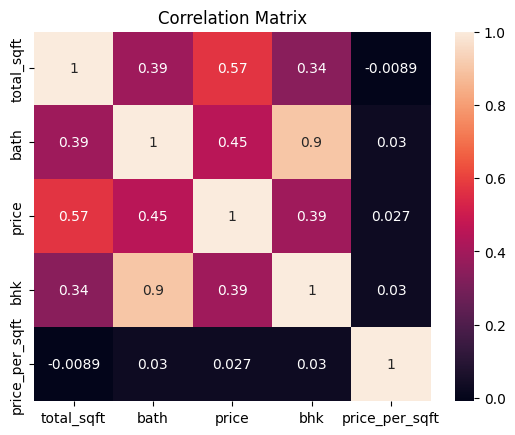

In [25]:
# Create heatmap
sns.heatmap(corr, annot=True)#coolwarm

# Add title
plt.title("Correlation Matrix")

# Show plot
plt.show()

- Total_sqft and Price Correlation (0.57): There is a moderate positive correlation (0.57) between the total square footage of a property (total_sqft) and its price (price). This suggests that larger properties tend to have higher prices, which is intuitive.
- 
Bath and BHK Correlation (998): There is a strong positive correlation (998) between the number of bathrooms (bath) and the number of bedrooms plus hall and kitchen (bhk). This correlation indicates that properties with more bedrooms tend to have more bathrooms, which is expected.* 

Bath and Price Correlation (.456): There is a moderate positive correlation (.456) between the number of bathrooms (bath) and the price (price) of a property. This suggests that properties with more bathrooms may tend to be more expensive, which could be due to larger or more luxurious properties typically having more bathroom- s.

BHK and Price Correlation(0.397): There is a moderate positive correlation(0.397) between the number of bedrooms plus hall and kitchen (bhk) and the price (price) of a property. This indicates that properties with more bedrooms may tend to be more expensive, likely due to their larger size or higher desirabil- ity.

Price and Price_per_sqft Correlati7n (0.028): There is a very weak positive correlati7n (0.028) between the price (price) of a property and its price per square foot (price_per_sqft). This suggests that the overall price of a property does not strongly correlate with its price per square foot, indicating that other factors may influence pricing more significantly.

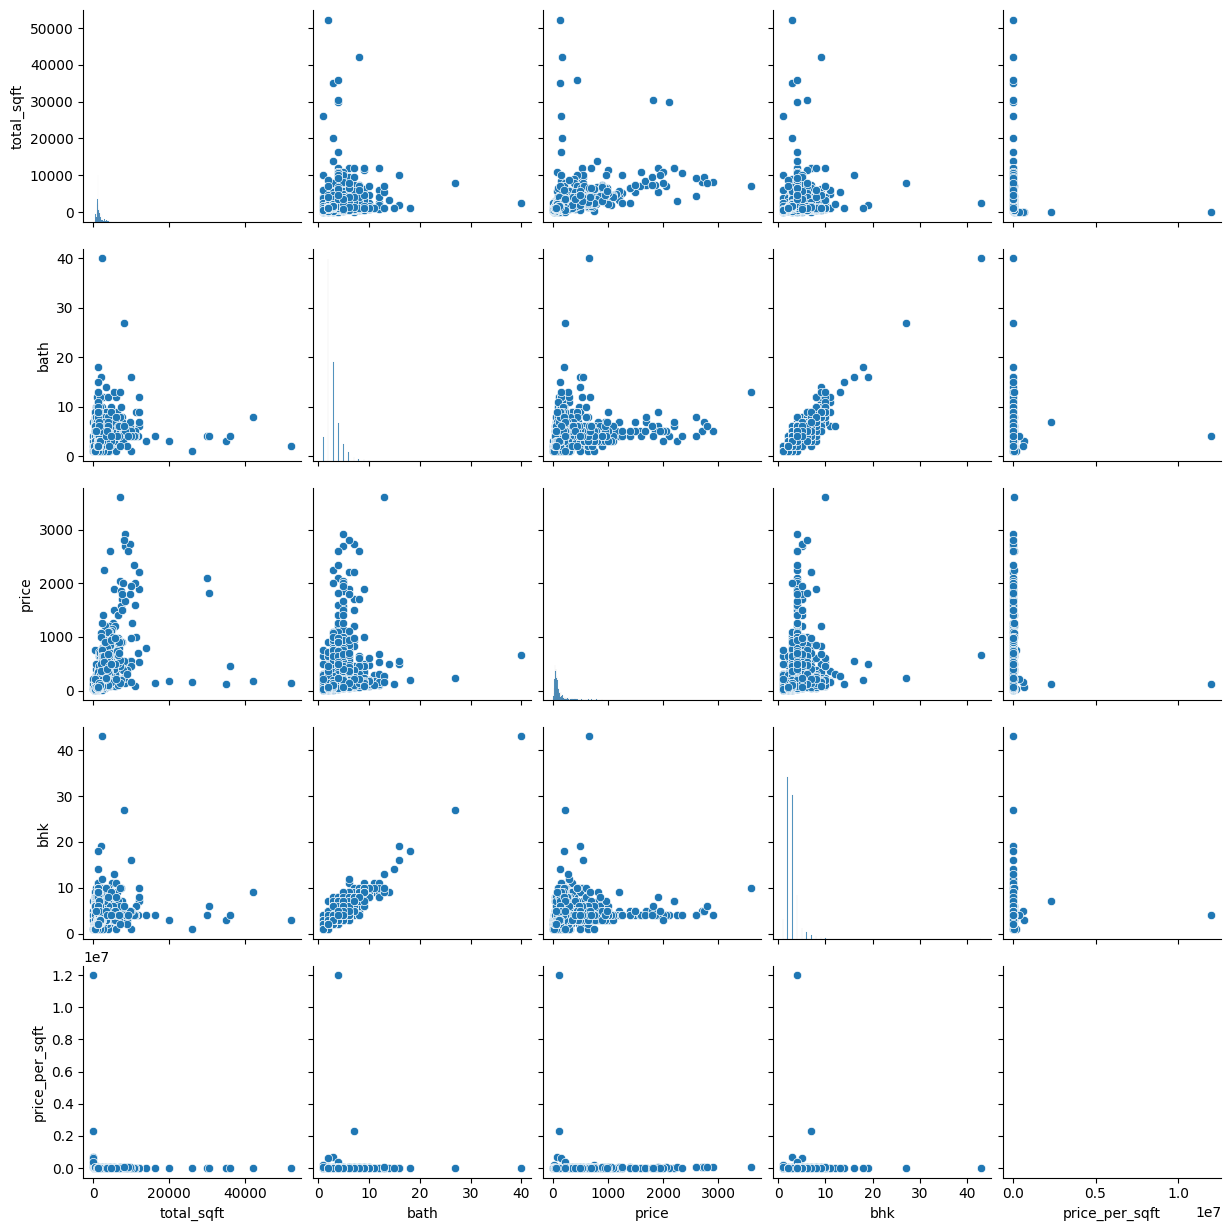

In [26]:
# Scatter plot between variables to check correlation
sns.pairplot(df)
plt.show()

## 1. Detect Outliers

### Using mean and std dev

In [27]:
m=df['price_per_sqft'].mean()
s=df['price_per_sqft'].std()
lower_threshold=m-3*s
upper_threshold=m+3*s
print("mean = ",m)
print("standard deviation = ",s)
print("-3sigma =",lower_threshold)
print("+3sigma =",upper_threshold)

mean =  8132.641840177763
standard deviation =  111232.90089570847
-3sigma = -325566.06084694766
+3sigma = 341831.3445273032


In [28]:
df_without_outliers=df[(df['price_per_sqft']>lower_threshold)&(df['price_per_sqft']<upper_threshold)]
df_without_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [29]:
df_outliers=df[(df['price_per_sqft']<lower_threshold)|(df['price_per_sqft']>upper_threshold)]
df_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [30]:
print("Total outliers find out using mean")
print(len(df)-len(df_without_outliers))

Total outliers find out using mean
5


[]

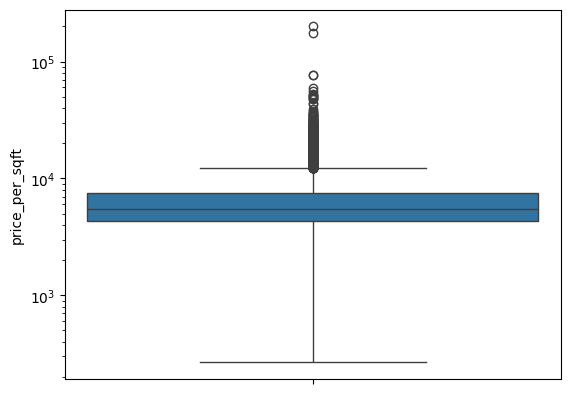

In [31]:
sns.boxplot(data=df_without_outliers.price_per_sqft)
plt.yscale('log')
plt.plot()

Still there are outliers. Using mean and standard deviation ,we can't effectively find out outliers from a right skewed data.

### Using Percentile method

In [32]:
df.price_per_sqft.quantile([.01,.05,.1,.2,.3,.4,.5,.6,.7,.8,.85,.9,.95,.96])

0.01     2532.0
0.05     3150.0
0.10     3513.0
0.20     4085.0
0.30     4545.0
0.40     5000.0
0.50     5500.0
0.60     6096.0
0.70     6896.0
0.80     8235.0
0.85     9674.5
0.90    11904.0
0.95    15600.0
0.96    16666.0
Name: price_per_sqft, dtype: float64

In [33]:
# Detect and remove outliers using Percentile method
lower_percentile = 0.05
upper_percentile = 0.95
lower_limit = df['price_per_sqft'].quantile(lower_percentile)
upper_limit = df['price_per_sqft'].quantile(upper_percentile)
print("lower_limit =",lower_limit)
print("upper_limit =",upper_limit)
df_percentile_outlier_removed = df[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft'] <= upper_limit)]
df_percentile_outlier_removed

lower_limit = 3150.0
upper_limit = 15600.0


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [34]:
print("Total outliers find out using percentile")
print(len(df)-len(df_percentile_outlier_removed))

Total outliers find out using percentile
1211


[]

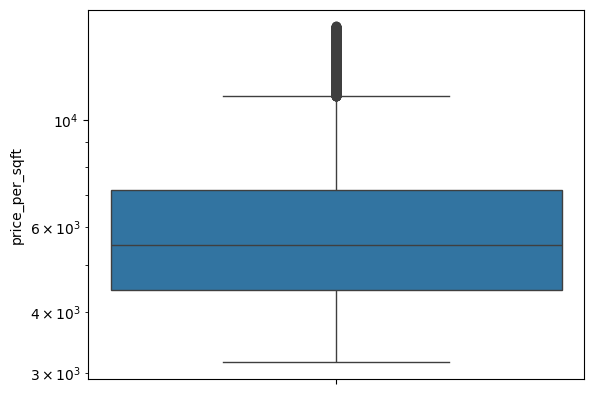

In [35]:
sns.boxplot(data=df_percentile_outlier_removed.price_per_sqft)
plt.yscale('log')
plt.plot()

### Using IQR(Inter quartile range method)

In [36]:
q1=df.price_per_sqft.quantile(0.25)
print("q1 = ",q1)
q3=df.price_per_sqft.quantile(0.75)
print("q3 = ",q3)
IQR=q3-q1
print("IQR = ",IQR)

q1 =  4312.0
q3 =  7461.0
IQR =  3149.0


In [37]:
lower_whisker=q1-1.5*IQR
upper_whisker=q3+1.5*IQR
lower_whisker,upper_whisker

(-411.5, 12184.5)

In [38]:
df_without_outliers_IQR=df[(df['price_per_sqft']>lower_whisker)&(df['price_per_sqft']<upper_whisker)]
df_without_outliers_IQR

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [39]:
print("Total outliers find out using IQR")
print(len(df)-len(df_without_outliers_IQR))

Total outliers find out using IQR
1142


[]

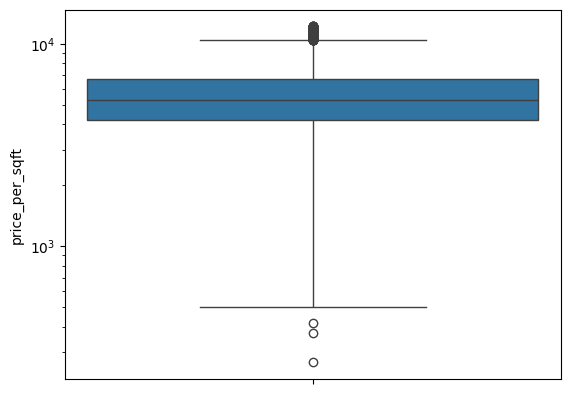

In [40]:
sns.boxplot(data=df_without_outliers_IQR.price_per_sqft)
plt.yscale('log')
plt.plot()

### Using Normal distribution
Zscore method

In [41]:
df["Z_Score"]=(df.price_per_sqft-m)/s
df

C:\Users\jisma\AppData\Local\Temp\ipykernel_2812\582994190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Z_Score"]=(df.price_per_sqft-m)/s


,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z_Score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039859
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.031624
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.034411
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.016970
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034906
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,-0.014408
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.012979
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.026776
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.025843


In [43]:
df_without_outlier_using_zscore=df[(df.Z_Score > -3)&(df.Z_Score < 3)]  # data without outliers
df_without_outlier_using_zscore

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z_Score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039859
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.031624
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.034411
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.016970
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034906
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,-0.014408
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.012979
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.026776
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.025843


In [44]:
print("Total outliers find out using ZScore")
print(len(df)-len(df_without_outlier_using_zscore))

Total outliers find out using ZScore
5


[]

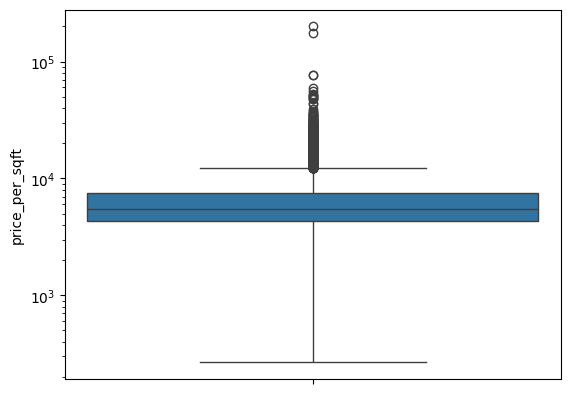

In [45]:
sns.boxplot(data=df_without_outlier_using_zscore.price_per_sqft)
plt.yscale('log')
plt.plot()

Indicating presence of outliers

Mean and Standard Deviation Method:

This method is based on the assumption that the data follows a normal distribution.
It identifies outliers as data points that lie beyond a certain number of standard deviations from the mean (e.g., more than 3 standard deviations away).
It's sensitive to extreme values and may not be suitable for skewed distributions or datasets with heavy tails.
Since your dataset has a wide range and possibly non-normal distribution, this method may not capture all outliers effectively.
Z-Score Method:

Similar to the mean and standard deviation method, the Z-score method identifies outliers based on how many standard deviations a data point is away from the mean.
It's more robust than the mean and standard deviation method because it considers the variability of the data.
However, it still assumes a normal distribution, which may not hold for your data.
Interquartile Range (IQR) Method:

This method is based on the quartiles of the data distribution.
It identifies outliers as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where IQR is the interquartile range (Q3 - Q1).
It's more robust to outliers and is suitable for skewed distributions or datasets with heavy tails.
It's likely capturing more outliers in your dataset due to its robustness.
Percentile Method:

Similar to the IQR method, the percentile method uses percentiles to detect outliers.
It's also robust to outliers and suitable for non-normal distributions.
It may capture slightly different outliers compared to the IQR method, depending on the exact thresholds used.
Considering the wide range of values and potential skewness in your dataset, it's not surprising to see variations in the number of outliers detected by different methods. The IQR method and the percentile method are generally more robust for such datasets. However, it's essential to consider the specific characteristics of your data and the goals of your analysis when choosing the most appropriate outlier detection method.

### Conclusion : It was found that, percentile method is the best choice here to remove outliers

## Removing Outliers

## Trimming

In [36]:
trimmed_df = df[(df['price_per_sqft'] >= df['price_per_sqft'].quantile(0.05)) &
            (df['price_per_sqft'] <= df['price_per_sqft'].quantile(0.95))]
trimmed_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z_Score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,-0.013027
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945


In [37]:
print("Total outliers find out using percentile")
print(len(df)-len(trimmed_df))

Total outliers find out using percentile
1320


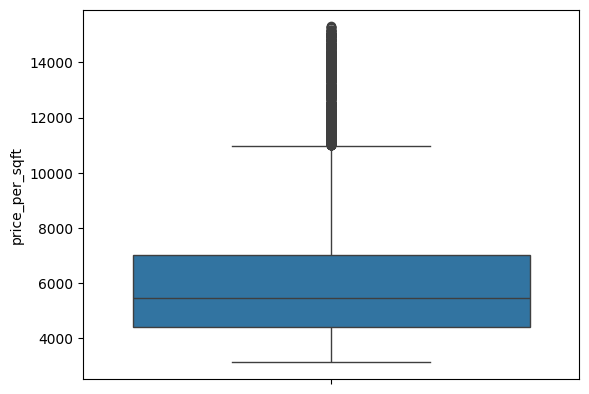

In [38]:
sns.boxplot(trimmed_df.price_per_sqft)
plt.show()

## Capping - Change the outlier values to upper or lower limit values

In [48]:
new_df=df.copy()
upper_limit=df['price_per_sqft'].quantile(0.95)
lower_limit=df['price_per_sqft'].quantile(0.05)
new_df.loc[new_df['price_per_sqft'] <= lower_limit, 'price_per_sqft'] = lower_limit
new_df.loc[new_df['price_per_sqft'] >= upper_limit, 'price_per_sqft'] = upper_limit
new_df

C:\Users\jisma\AppData\Local\Temp\ipykernel_6976\3420068645.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3107.8500000000004' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[new_df['price_per_sqft'] <= lower_limit, 'price_per_sqft'] = lower_limit


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.00
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.00
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.00
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.00
13196,other,4 BHK,3600.0,5.0,400.00,4,11111.00
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.00
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.00


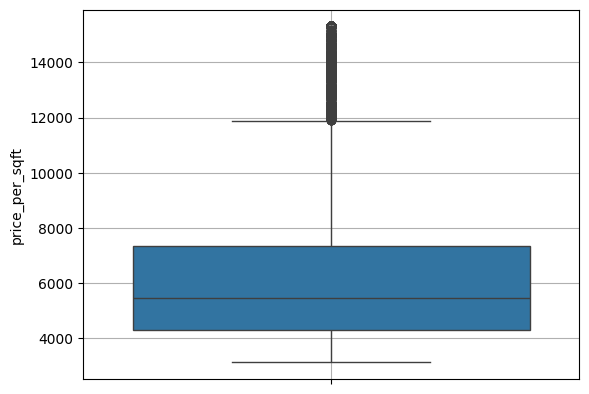

In [54]:
sns.boxplot(new_df.price_per_sqft)
plt.grid(True)
plt.show()

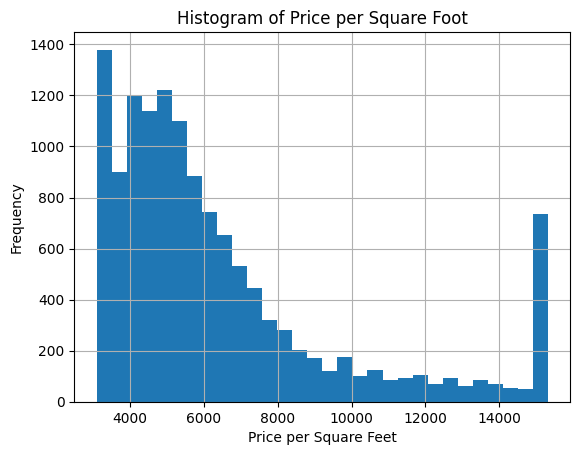

In [52]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'price_per_sqft' column

plt.hist(new_df['price_per_sqft'], bins=30)  # Adjust the number of bins as needed
plt.title('Histogram of Price per Square Foot')
plt.xlabel('Price per Square Feet')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [53]:
new_df['price_per_sqft'].describe()

count    13200.000000
mean      6442.066742
std       3197.780056
min       3107.850000
25%       4267.000000
50%       5438.000000
75%       7317.000000
max      15312.100000
Name: price_per_sqft, dtype: float64